<a href="https://colab.research.google.com/github/lcpbrandao/Basic_ML_training/blob/master/ML_Iris_Laislla_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
import os

%env SPARK_HOME=/opt/spark-2.4.3

exec(open(os.path.join(os.environ["SPARK_HOME"], 'python/pyspark/shell.py')).read())
sqlContext = SQLContext(sc)

env: SPARK_HOME=/opt/spark-2.4.3
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.3
      /_/

Using Python version 3.5.2 (default, Nov 12 2018 13:43:14)
SparkSession available as 'spark'.


In [ ]:
data = spark.read.csv("iris.data", header = False, inferSchema = True )

In [ ]:
data.show(5)

+---+---+---+---+-----------+
|_c0|_c1|_c2|_c3|        _c4|
+---+---+---+---+-----------+
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|4.7|3.2|1.3|0.2|Iris-setosa|
|4.6|3.1|1.5|0.2|Iris-setosa|
|5.0|3.6|1.4|0.2|Iris-setosa|
+---+---+---+---+-----------+
only showing top 5 rows



In [ ]:
#TRANSFORMAR FEATURES EM VETOR PARA PODER COLOCAR NO MODELO

from pyspark.ml.feature import VectorAssembler

vAssembler = VectorAssembler(inputCols = ['_c0', '_c1', '_c2', '_c3'],outputCol = 'features')
df2 = vAssembler.transform(data) # Adiciona uma nova coluna a df
df2 = df2.select(['features', '_c4']) # Seleciona apenas a nova coluna e a saída

In [ ]:
#SEPARAR BASE DE TREINAMENTO E TESTE

from pyspark.sql import DataFrame
splits = df2.randomSplit([0.7, 0.3]) # Divide os dados em dois conjuntos randômicos
train = splits[0] # com 70% dos dados
test = splits[1] # e os 30% restantes

train.show(3)
test.show(3)

+-----------------+-----------+
|         features|        _c4|
+-----------------+-----------+
|[4.4,3.0,1.3,0.2]|Iris-setosa|
|[4.6,3.1,1.5,0.2]|Iris-setosa|
|[4.6,3.2,1.4,0.2]|Iris-setosa|
+-----------------+-----------+
only showing top 3 rows

+-----------------+-----------+
|         features|        _c4|
+-----------------+-----------+
|[4.3,3.0,1.1,0.1]|Iris-setosa|
|[4.4,2.9,1.4,0.2]|Iris-setosa|
|[4.4,3.2,1.3,0.2]|Iris-setosa|
+-----------------+-----------+
only showing top 3 rows



In [ ]:
#MODELO K-Means (K=2)

from pyspark.ml.clustering import KMeans # importa o pacote cluster

kMeans = KMeans(featuresCol='features', k=2) # Cria o modelo

model_k2 = kMeans.fit(train) # Computa os clusters k-means
prediction_k2 = model_k2.transform(df2) # Calcula os grupos para dados de test

In [ ]:
#MODELO K-Means (K=3)

kMeans = KMeans(featuresCol='features', k=3) # Cria o modelo

model_k3 = kMeans.fit(train) # Computa os clusters k-means
prediction_k3 = model_k3.transform(df2) # Calcula os grupos para dados de test

In [ ]:
#MODELO K-Means (K=4)

kMeans = KMeans(featuresCol='features', k=4) # Cria o modelo

model_k4 = kMeans.fit(train) # Computa os clusters k-means
prediction_k4 = model_k4.transform(df2) # Calcula os grupos para dados de test

In [ ]:
#TRANSFORMAR COLUNA PREDITORA ('_c4') DE CATEGÓRICA PARA ÍNDICE

from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="_c4", outputCol="Nome")
df = indexer.fit(data).transform(data)
df.show()

+---+---+---+---+-----------+----+
|_c0|_c1|_c2|_c3|        _c4|Nome|
+---+---+---+---+-----------+----+
|5.1|3.5|1.4|0.2|Iris-setosa| 0.0|
|4.9|3.0|1.4|0.2|Iris-setosa| 0.0|
|4.7|3.2|1.3|0.2|Iris-setosa| 0.0|
|4.6|3.1|1.5|0.2|Iris-setosa| 0.0|
|5.0|3.6|1.4|0.2|Iris-setosa| 0.0|
|5.4|3.9|1.7|0.4|Iris-setosa| 0.0|
|4.6|3.4|1.4|0.3|Iris-setosa| 0.0|
|5.0|3.4|1.5|0.2|Iris-setosa| 0.0|
|4.4|2.9|1.4|0.2|Iris-setosa| 0.0|
|4.9|3.1|1.5|0.1|Iris-setosa| 0.0|
|5.4|3.7|1.5|0.2|Iris-setosa| 0.0|
|4.8|3.4|1.6|0.2|Iris-setosa| 0.0|
|4.8|3.0|1.4|0.1|Iris-setosa| 0.0|
|4.3|3.0|1.1|0.1|Iris-setosa| 0.0|
|5.8|4.0|1.2|0.2|Iris-setosa| 0.0|
|5.7|4.4|1.5|0.4|Iris-setosa| 0.0|
|5.4|3.9|1.3|0.4|Iris-setosa| 0.0|
|5.1|3.5|1.4|0.3|Iris-setosa| 0.0|
|5.7|3.8|1.7|0.3|Iris-setosa| 0.0|
|5.1|3.8|1.5|0.3|Iris-setosa| 0.0|
+---+---+---+---+-----------+----+
only showing top 20 rows



In [ ]:
import matplotlib.pyplot as plt

data = df.collect()
sL = [float(row['_c0']) for row in data]
sW = [float(row['_c1']) for row in data]
pL = [float(row['_c2']) for row in data]
pW = [float(row['_c3']) for row in data]
labels = [float(row['Nome']) for row in data]

plt.subplot(1,2,1)
plt.scatter(sL, sW, c=labels)
plt.subplot(1,2,2)
plt.scatter(pL, pW, c=labels)
plt.title("My Plot")

Text(0.5,1,'My Plot')

In [ ]:
#TRANSFORMAR COLUNA PREDITA ('prediction_k2') DE CATEGÓRICA PARA ÍNDICE

from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="_c4", outputCol="Nome_k2")
df_k2 = indexer.fit(prediction_k2).transform(prediction_k2)
df_k2.show()

indexer = StringIndexer(inputCol="_c4", outputCol="Nome_k3")
df_k3 = indexer.fit(prediction_k3).transform(prediction_k3)
df_k3.show()

indexer = StringIndexer(inputCol="_c4", outputCol="Nome_k4")
df_k4 = indexer.fit(prediction_k4).transform(prediction_k4)
df_k4.show()

+-----------------+-----------+----------+-------+
|         features|        _c4|prediction|Nome_k2|
+-----------------+-----------+----------+-------+
|[5.1,3.5,1.4,0.2]|Iris-setosa|         1|    0.0|
|[4.9,3.0,1.4,0.2]|Iris-setosa|         1|    0.0|
|[4.7,3.2,1.3,0.2]|Iris-setosa|         1|    0.0|
|[4.6,3.1,1.5,0.2]|Iris-setosa|         1|    0.0|
|[5.0,3.6,1.4,0.2]|Iris-setosa|         1|    0.0|
|[5.4,3.9,1.7,0.4]|Iris-setosa|         1|    0.0|
|[4.6,3.4,1.4,0.3]|Iris-setosa|         1|    0.0|
|[5.0,3.4,1.5,0.2]|Iris-setosa|         1|    0.0|
|[4.4,2.9,1.4,0.2]|Iris-setosa|         1|    0.0|
|[4.9,3.1,1.5,0.1]|Iris-setosa|         1|    0.0|
|[5.4,3.7,1.5,0.2]|Iris-setosa|         1|    0.0|
|[4.8,3.4,1.6,0.2]|Iris-setosa|         1|    0.0|
|[4.8,3.0,1.4,0.1]|Iris-setosa|         1|    0.0|
|[4.3,3.0,1.1,0.1]|Iris-setosa|         1|    0.0|
|[5.8,4.0,1.2,0.2]|Iris-setosa|         1|    0.0|
|[5.7,4.4,1.5,0.4]|Iris-setosa|         1|    0.0|
|[5.4,3.9,1.3,0.4]|Iris-setosa|

Text(0.5,1,'My Plot')

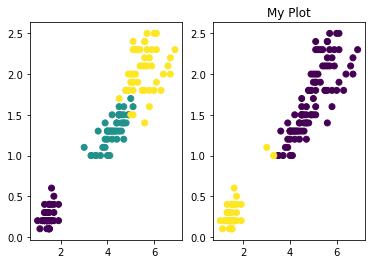

In [ ]:
# COMPARAÇÃO CLUSTERS REAIS E CLUSTERS PREDITOS (K=2)
import matplotlib.pyplot as plt

data = df.collect()
data_k2 = df_k2.collect()
pL = [float(row['_c2']) for row in data]
pW = [float(row['_c3']) for row in data]
labels = [float(row['Nome']) for row in data]
labels_k2 = [float(row['prediction']) for row in data_k2]

plt.subplot(1,2,1)
plt.scatter(pL, pW, c=labels)
plt.subplot(1,2,2)
plt.scatter(pL, pW, c=labels_k2)
plt.title("My Plot")

Text(0.5,1,'My Plot')

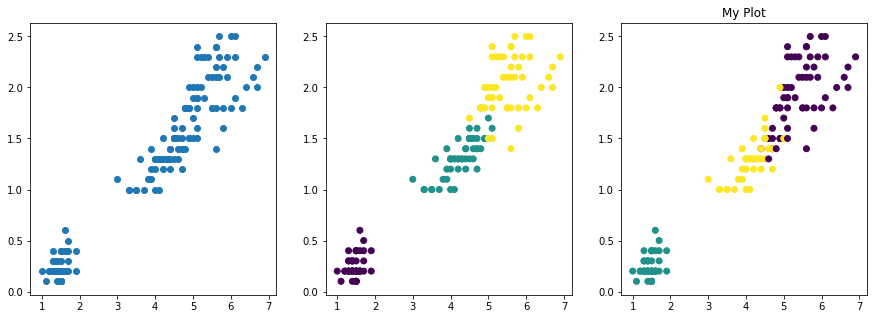

In [ ]:
# COMPARAÇÃO CLUSTERS REAIS E CLUSTERS PREDITOS (K=3)

data = df.collect()
data_k3 = df_k3.collect()
pL = [float(row['_c2']) for row in data]
pW = [float(row['_c3']) for row in data]
labels = [float(row['Nome']) for row in data]
labels_k3 = [float(row['prediction']) for row in data_k3]

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(pL, pW)
plt.subplot(1,3,2)
plt.scatter(pL, pW, c=labels)
plt.subplot(1,3,3)
plt.scatter(pL, pW, c=labels_k3)
plt.title("My Plot")

Text(0.5,1,'My Plot')

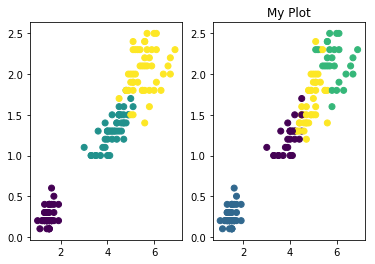

In [ ]:
# COMPARAÇÃO CLUSTERS REAIS E CLUSTERS PREDITOS (K=4)

data = df.collect()
data_k4 = df_k4.collect()
pL = [float(row['_c2']) for row in data]
pW = [float(row['_c3']) for row in data]
labels = [float(row['Nome']) for row in data]
labels_k4 = [float(row['prediction']) for row in data_k4]

plt.subplot(1,2,1)
plt.scatter(pL, pW, c=labels)
plt.subplot(1,2,2)
plt.scatter(pL, pW, c=labels_k4)
plt.title("My Plot")

In [ ]:
# FUNÇÃO CUSTO

wssse2 = model_k2.computeCost(df_k2)
wssse3 = model_k3.computeCost(df_k3)
wssse4 = model_k4.computeCost(df_k4)
print("Within Set Sum of Squared Errors for K2" + ' = ' + str(wssse2))
print("Within Set Sum of Squared Errors for K3" + ' = ' + str(wssse3))
print("Within Set Sum of Squared Errors for K4" + ' = ' + str(wssse4))

Within Set Sum of Squared Errors for K2 = 153.08017484976094
Within Set Sum of Squared Errors for K3 = 85.16658299975859
Within Set Sum of Squared Errors for K4 = 58.42026449321712
